11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
844/844 [==============================] - 14s 15ms/step - loss: 0.4016 - accuracy: 0.8802 - val_loss: 0.2109 - val_accuracy: 0.9415
Epoch 2/5
844/844 [==============================] - 13s 15ms/step - loss: 0.1986 - accuracy: 0.9412 - val_loss: 0.1173 - val_accuracy: 0.9658
Epoch 3/5
844/844 [==============================] - 12s 14ms/step - loss: 0.1633 - accuracy: 0.9516 - val_loss: 0.1274 - val_accuracy: 0.9642
Epoch 4/5
844/844 [==============================] - 13s 16ms/step - loss: 0.1386 - accuracy: 0.9590 - val_loss: 0.1459 - val_accuracy: 0.9603
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.1203 - accuracy: 0.9641
Test accuracy: 0.9641000032424927
1/1 [==============================] - 0s 182ms/step


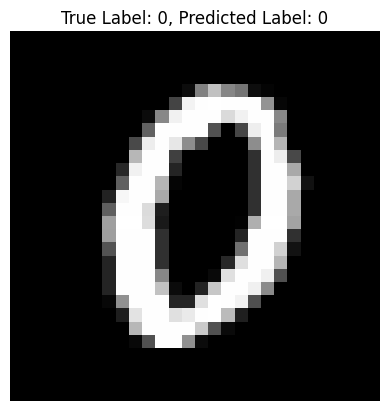

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define the model architecture
model = keras.models.Sequential([
    keras.layers.SimpleRNN(128, input_shape=(28, 28)),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Reshape the input data to fit the RNN input shape
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Choose a random test image
index = np.random.randint(0, len(X_test))
test_image = X_test[index]
true_label = y_test[index]

# Make a prediction
prediction = np.argmax(model.predict(test_image.reshape(1, 28, 28)))

# Display the image and prediction
plt.imshow(test_image, cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {prediction}")
plt.axis('off')
plt.show()